In [2]:
import numpy as np
from numpy import linalg as LA
from scipy.sparse.linalg import eigs
from scipy import sparse
import networkx as nx
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot as plt
np.random.seed(1)

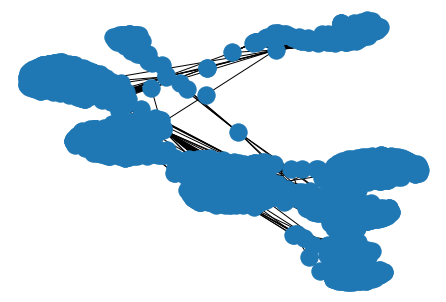

In [3]:
my_graph = nx.Graph()
edges = nx.read_edgelist('facebook_combined.txt')
my_graph.add_edges_from(edges.edges())
pos = nx.spring_layout(my_graph)
nx.draw(my_graph, pos = pos,font_weight='bold')

In [4]:
adj_mat = nx.adjacency_matrix(my_graph)
print(adj_mat.todense())
adj_mat

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<4039x4039 sparse matrix of type '<class 'numpy.intc'>'
	with 176468 stored elements in Compressed Sparse Row format>

In [5]:
# degree matrix
D = np.diag(np.sum(np.array(adj_mat.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - adj_mat
print('laplacian matrix:')
print(L)
Lap_mat = sparse.csr_matrix(L) 

degree matrix:
[[347   0   0 ...   0   0   0]
 [  0  17   0 ...   0   0   0]
 [  0   0  10 ...   0   0   0]
 ...
 [  0   0   0 ...   4   0   0]
 [  0   0   0 ...   0   4   0]
 [  0   0   0 ...   0   0   6]]
laplacian matrix:
[[347  -1  -1 ...   0   0   0]
 [ -1  17   0 ...   0   0   0]
 [ -1   0  10 ...   0   0   0]
 ...
 [  0   0   0 ...   4   0   0]
 [  0   0   0 ...   0   4   0]
 [  0   0   0 ...   0   0   6]]


In [6]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[1046.0051881 +0.j  792.9952551 +0.j  756.00058809+0.j ...
    9.        +0.j    9.        +0.j    9.        +0.j]
eigenvectors:
[[ 1.42784705e-03+0.j -2.97043036e-06+0.j  6.60437695e-06+0.j ...
  -2.79272990e-18+0.j  1.39982293e-18+0.j -5.96385825e-18+0.j]
 [-1.36541045e-06+0.j  1.50207767e-09+0.j -1.38759455e-08+0.j ...
   5.77071117e-16+0.j -1.09621070e-15+0.j  7.39375719e-16+0.j]
 [-1.36635403e-06+0.j  3.75056585e-09+0.j -8.74751229e-09+0.j ...
  -4.12029607e-16+0.j  2.59439734e-15+0.j -1.96203034e-15+0.j]
 ...
 [-6.42975010e-12+0.j -2.20054695e-09+0.j  5.42401951e-14+0.j ...
  -1.04366019e-16+0.j -9.66224117e-17+0.j -1.12787082e-17+0.j]
 [-6.42980631e-12+0.j -2.20057440e-09+0.j  5.42408100e-14+0.j ...
   2.05764154e-16+0.j -1.16201829e-16+0.j -2.22321924e-16+0.j]
 [-6.42468059e-12+0.j -2.20057451e-09+0.j  5.42892032e-14+0.j ...
   1.07301562e-16+0.j -9.22733126e-16+0.j -1.16657752e-15+0.j]]


In [6]:
e_zeros = [a for a in e if a < 0.5]
len(e_zeros)

7

In [8]:
adj_matrix = nx.to_numpy_matrix(my_graph) #Converts graph to an adj matrix with adj_matrix[i][j] represents weight between node i,j.
node_list = list(my_graph.nodes())
edge_list = list(my_graph.edges())

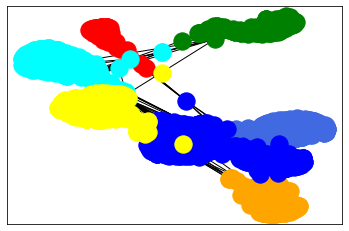

In [8]:
clusters = SpectralClustering(affinity = 'precomputed', assign_labels="kmeans",random_state=0,n_clusters=7).fit_predict(adj_mat)


node_cluster_map = dict(zip(node_list, clusters))
colors = ['green', 'royalblue', 'red', 'orange', 'cyan','blue','yellow']
color_map = dict(zip(range(7), colors))
graph = nx.Graph()
graph.add_nodes_from(node_list)

nodes_by_color = {val: [node for node in graph if color_map[node_cluster_map[node]] == val]
                  for val in colors}

for color, node_names in nodes_by_color.items():
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)
graph.add_edges_from(edge_list)    

nx.draw_networkx_edges(graph, pos=pos)

In [9]:
cluster_1_nodes = []
cluster_2_nodes = []
cluster_3_nodes = []
cluster_4_nodes = []
cluster_5_nodes = []
cluster_6_nodes = []
cluster_7_nodes = []

for ea in pos.keys():
    if ea in nodes_by_color['green']:
        cluster_1_nodes.append(ea)
    elif ea in nodes_by_color['royalblue']:
        cluster_2_nodes.append(ea)
    elif ea in nodes_by_color['red']:
        cluster_3_nodes.append(ea)
    elif ea in nodes_by_color['orange']:
        cluster_4_nodes.append(ea)
    elif ea in nodes_by_color['cyan']:
        cluster_5_nodes.append(ea)
    elif ea in nodes_by_color['blue']:
        cluster_6_nodes.append(ea)
    elif ea in nodes_by_color['yellow']:
        cluster_7_nodes.append(ea)
        
len(cluster_1_nodes),len(cluster_2_nodes),len(cluster_3_nodes),len(cluster_4_nodes),len(cluster_5_nodes),len(cluster_6_nodes),len(cluster_7_nodes)

(205, 752, 59, 341, 548, 1348, 786)

In [10]:
cluster_1 = graph.subgraph(cluster_1_nodes)
cluster_2 = graph.subgraph(cluster_2_nodes)
cluster_3 = graph.subgraph(cluster_3_nodes)
cluster_4 = graph.subgraph(cluster_4_nodes)
cluster_5 = graph.subgraph(cluster_5_nodes)
cluster_6 = graph.subgraph(cluster_6_nodes)
cluster_7 = graph.subgraph(cluster_7_nodes)

In [11]:
center_1 = nx.center(cluster_1)
center_2 = nx.center(cluster_2)
center_3 = nx.center(cluster_3)
center_4 = nx.center(cluster_4)
center_5 = nx.center(cluster_5)
center_6 = nx.center(cluster_6)
center_7 = nx.center(cluster_7)

In [12]:
print("Center nodes of Cluster 1:")
print(center_1)
print("Center nodes of Cluster 2:")
print(center_2)
print("Center nodes of Cluster 3:")
print(center_3)
print("Center nodes of Cluster 4:")
print(center_4)
print("Center nodes of Cluster 5:")
print(center_5)
print("Center nodes of Cluster 6:")
print(center_6)
print("Center nodes of Cluster 7:")
print(center_7)

Center nodes of Cluster 1:
['747', '713', '810', '703', '772', '798', '719', '729', '823', '774', '804', '805', '769', '698', '800', '825', '753', '803', '708', '828', '811', '856', '686', '697', '830', '840', '745', '776', '819']
Center nodes of Cluster 2:
['1912']
Center nodes of Cluster 3:
['3980']
Center nodes of Cluster 4:
['0']
Center nodes of Cluster 5:
['3797', '3721', '1085', '3456', '3626', '3501', '3577', '3592', '3779', '3495', '3437', '3872', '862', '3621', '3550', '3517', '3684', '3609', '857', '3633', '3948', '3677', '3586']
Center nodes of Cluster 6:
['483', '376', '563', '414', '566', '348', '475', '428', '107']
Center nodes of Cluster 7:
['1684']


In [10]:
e_vals,e_vecs = eigs(adj_matrix, k = 6)
e_val_max = max(e_vals)
rho = 1/e_val_max
alpha = 0.5 * (rho).real
print(rho)
print(alpha)

(0.006158623641304022+0j)
0.003079311820652011


In [24]:
eg_centrality = nx.eigenvector_centrality(graph)
print("First 12 nodes with highest Eigenvector Centrality in the network")
display(sorted(eg_centrality.items(), key=lambda f: f[1], reverse = True)[:12])

kz_centrality = nx.katz_centrality(graph, alpha)
print("First 12 nodes with highest Katz Centrality in the network")
display(sorted(kz_centrality.items(), key=lambda f: f[1], reverse = True)[:12])

dg_centrality = nx.degree_centrality(graph)
print("First 12 nodes with highest Degree Centrality in the network")
display(sorted(dg_centrality.items(), key=lambda f: f[1], reverse = True)[:12])

spb_centrality = nx.betweenness_centrality(graph)
print("First 12 nodes with highest Shortest Path Betweenness Centrality in the network")
display(sorted(spb_centrality.items(), key=lambda f: f[1], reverse = True)[:12])

First 12 nodes with highest Eigenvector Centrality in the network


[('1912', 0.09540696149067633),
 ('2266', 0.08698327767886553),
 ('2206', 0.0860523927058434),
 ('2233', 0.08517340912756598),
 ('2464', 0.08427877475676092),
 ('2142', 0.08419311897991795),
 ('2218', 0.08415573568055032),
 ('2078', 0.08413617041724976),
 ('2123', 0.08367141238206224),
 ('1993', 0.0835324284081597),
 ('2410', 0.0835175116214819),
 ('2244', 0.08334186008004285)]

First 12 nodes with highest Katz Centrality in the network


[('107', 0.06418939083650059),
 ('1912', 0.05554549226809295),
 ('1684', 0.04846720640132563),
 ('3437', 0.03562984914234513),
 ('2347', 0.03379814870999059),
 ('2543', 0.033517005512886264),
 ('2266', 0.030407975734294514),
 ('1985', 0.02987959313184934),
 ('2233', 0.029779769378018642),
 ('2142', 0.029610130489357192),
 ('2206', 0.02919535857838445),
 ('2410', 0.028862080127472944)]

First 12 nodes with highest Degree Centrality in the network


[('107', 0.258791480931154),
 ('1684', 0.1961367013372957),
 ('1912', 0.18697374938088163),
 ('3437', 0.13546310054482416),
 ('0', 0.08593363051015354),
 ('2543', 0.07280832095096582),
 ('2347', 0.07206537890044576),
 ('1888', 0.0629024269440317),
 ('1800', 0.06067360079247152),
 ('1663', 0.058197127290737984),
 ('1352', 0.05794947994056463),
 ('2266', 0.05794947994056463)]

First 12 nodes with highest Shortest Path Betweenness Centrality in the network


[('107', 0.4805180785560152),
 ('1684', 0.3377974497301997),
 ('3437', 0.236115357358927),
 ('1912', 0.22929533958687828),
 ('1085', 0.1490150921166576),
 ('0', 0.14630592147443144),
 ('698', 0.11533045020561003),
 ('567', 0.09631033121856167),
 ('58', 0.08436020590796443),
 ('428', 0.06430906239323894),
 ('563', 0.0627802284724079),
 ('860', 0.057825906870914066)]

In [44]:
print("Average Katz Centrality measure")
display(np.array(list(kz_centrality.values())).mean())
print("Average Eigenvector Centrality measure")
display(np.array(list(eg_centrality.values())).mean())
print("Average Degree Centrality measure")
display(np.array(list(dg_centrality.values())).mean())
print("Average Betweenness Centrality measure")
display(np.array(list(spb_centrality.values())).mean())

Average Katz Centrality measure


0.015331952176446667

Average Eigenvector Centrality measure


0.003864340807927154

Average Degree Centrality measure


0.010819963503439287

Average Betweenness Centrality measure


0.0006669573568730238

In [48]:
print("Katz Centrality measure of cluster 1 centres")
display(np.array([kz_centrality[i] for i in center_1]).mean())
print("Katz Centrality measure of cluster 2 centres")
display(np.array([kz_centrality[i] for i in center_2]).mean())
print("Katz Centrality measure of cluster 3 centres")
display(np.array([kz_centrality[i] for i in center_3]).mean())
print("Katz Centrality measure of cluster 4 centres")
display(np.array([kz_centrality[i] for i in center_4]).mean())
print("Katz Centrality measure of cluster 5 centres")
display(np.array([kz_centrality[i] for i in center_5]).mean())
print("Katz Centrality measure of cluster 6 centres")
display(np.array([kz_centrality[i] for i in center_6]).mean())
print("Katz Centrality measure of cluster 7 centres")
display(np.array([kz_centrality[i] for i in center_7]).mean())

Katz Centrality measure of cluster 1 centres


0.01453631282209463

Katz Centrality measure of cluster 2 centres


0.05554549226809295

Katz Centrality measure of cluster 3 centres


0.015070001957921382

Katz Centrality measure of cluster 4 centres


0.027254165550663574

Katz Centrality measure of cluster 5 centres


0.015330726761023625

Katz Centrality measure of cluster 6 centres


0.024617332130078926

Katz Centrality measure of cluster 7 centres


0.04846720640132563

In [49]:
print("Degree Centrality measure of cluster 1 centres")
display(np.array([dg_centrality[i] for i in center_1]).mean())
print("Degree Centrality measure of cluster 2 centres")
display(np.array([dg_centrality[i] for i in center_2]).mean())
print("Degree Centrality measure of cluster 3 centres")
display(np.array([dg_centrality[i] for i in center_3]).mean())
print("Degree Centrality measure of cluster 4 centres")
display(np.array([dg_centrality[i] for i in center_4]).mean())
print("Degree Centrality measure of cluster 5 centres")
display(np.array([dg_centrality[i] for i in center_5]).mean())
print("Degree Centrality measure of cluster 6 centres")
display(np.array([dg_centrality[i] for i in center_6]).mean())
print("Degree Centrality measure of cluster 7 centres")
display(np.array([dg_centrality[i] for i in center_7]).mean())

Degree Centrality measure of cluster 1 centres


0.010264555686495534

Degree Centrality measure of cluster 2 centres


0.18697374938088163

Degree Centrality measure of cluster 3 centres


0.014611193660227836

Degree Centrality measure of cluster 4 centres


0.08593363051015354

Degree Centrality measure of cluster 5 centres


0.014471219070999419

Degree Centrality measure of cluster 6 centres


0.06081118265367894

Degree Centrality measure of cluster 7 centres


0.1961367013372957

In [50]:
print("Eigenvector Centrality measure of cluster 1 centres")
display(np.array([eg_centrality[i] for i in center_1]).mean())
print("Eigenvector Centrality measure of cluster 2 centres")
display(np.array([eg_centrality[i] for i in center_2]).mean())
print("Eigenvector Centrality measure of cluster 3 centres")
display(np.array([eg_centrality[i] for i in center_3]).mean())
print("Eigenvector Centrality measure of cluster 4 centres")
display(np.array([eg_centrality[i] for i in center_4]).mean())
print("Eigenvector Centrality measure of cluster 5 centres")
display(np.array([eg_centrality[i] for i in center_5]).mean())
print("Eigenvector Centrality measure of cluster 6 centres")
display(np.array([eg_centrality[i] for i in center_6]).mean())
print("Eigenvector Centrality measure of cluster 7 centres")
display(np.array([eg_centrality[i] for i in center_7]).mean())

Eigenvector Centrality measure of cluster 1 centres


4.6626942784463956e-11

Eigenvector Centrality measure of cluster 2 centres


0.09540696149067633

Eigenvector Centrality measure of cluster 3 centres


4.72235626127197e-08

Eigenvector Centrality measure of cluster 4 centres


3.3917961722702e-05

Eigenvector Centrality measure of cluster 5 centres


1.596133340008381e-07

Eigenvector Centrality measure of cluster 6 centres


0.00017104282526949125

Eigenvector Centrality measure of cluster 7 centres


7.164259790119272e-06

In [53]:
print("Betweenness Centrality measure of cluster 1 centres")
display(np.array([spb_centrality[i] for i in center_1]).mean())
print("Betweenness Centrality measure of cluster 2 centres")
display(np.array([spb_centrality[i] for i in center_2]).mean())
print("Betweenness Centrality measure of cluster 3 centres")
display(np.array([spb_centrality[i] for i in center_3]).mean())
print("Betweenness Centrality measure of cluster 4 centres")
display(np.array([spb_centrality[i] for i in center_4]).mean())
print("Betweenness Centrality measure of cluster 5 centres")
display(np.array([spb_centrality[i] for i in center_5]).mean())
print("Betweenness Centrality measure of cluster 6 centres")
display(np.array([spb_centrality[i] for i in center_6]).mean())
print("Betweenness Centrality measure of cluster 7 centres")
display(np.array([spb_centrality[i] for i in center_7]).mean())

Betweenness Centrality measure of cluster 1 centres


0.006349208454965189

Betweenness Centrality measure of cluster 2 centres


0.22929533958687828

Betweenness Centrality measure of cluster 3 centres


0.02482003363624553

Betweenness Centrality measure of cluster 4 centres


0.14630592147443144

Betweenness Centrality measure of cluster 5 centres


0.01778349217459093

Betweenness Centrality measure of cluster 6 centres


0.07961429396815625

Betweenness Centrality measure of cluster 7 centres


0.3377974497301997

In [15]:
eg_12_nodes = sorted(eg_centrality.items(), key=lambda f: f[1], reverse = True)[:12]
kz_12_nodes = sorted(kz_centrality.items(), key=lambda f: f[1], reverse = True)[:12]
df_eg_12_nodes = pd.DataFrame.from_records(eg_12_nodes, columns =['Node', 'Centrality']) 

df_kz_12_nodes = pd.DataFrame.from_records(kz_12_nodes, columns =['Node', 'Centrality'])
df_eg_12_nodes.index = df_eg_12_nodes.index + 1
df_kz_12_nodes.index = df_kz_12_nodes.index + 1
df_kz_12_nodes

,Node,Centrality
1,107,0.035290
2,1912,0.030178
3,1684,0.029938
4,3437,0.024982
5,2543,0.021261
6,0,0.021251
7,2347,0.021243
8,1888,0.020196
9,2266,0.020024
10,1800,0.020011


In [16]:
spb_12_nodes = sorted(spb_centrality.items(), key=lambda f: f[1], reverse = True)[:12]
df_spb_12_nodes = pd.DataFrame.from_records(spb_12_nodes, columns =['Node', 'Centrality']) 
df_spb_12_nodes.index = df_spb_12_nodes.index + 1
df_spb_12_nodes

,Node,Centrality
1,107,0.480518
2,1684,0.337797
3,3437,0.236115
4,1912,0.229295
5,1085,0.149015
6,0,0.146306
7,698,0.115330
8,567,0.096310
9,58,0.084360
10,428,0.064309


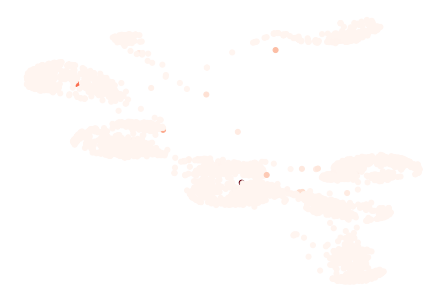

In [17]:
kz_network = dict(sorted(kz_centrality.items(), key=lambda f: f[1], reverse = True))
eg_network = dict(sorted(eg_centrality.items(), key=lambda f: f[1], reverse = True))
spb_network = dict(sorted(spb_centrality.items(), key=lambda f: f[1], reverse = True))
# Katz Heat Map

# Eigenvector Heat Map

# Shortest Path Betweenness Heat Map
spb_heat_graph = nx.Graph()
spb_heat_graph.add_nodes_from(node_list)
values = [spb_network.get(node) for node in spb_heat_graph.nodes()]
normed_values = [i / max(values) for i in values]
nx.draw(spb_heat_graph,pos = pos,node_size = 25,cmap=plt.cm.Reds, node_color=normed_values)

In [18]:
# Eigenvector_Centrality
eg_centrality_cluster_1 = nx.eigenvector_centrality(cluster_1)
eg_centrality_cluster_2 = nx.eigenvector_centrality(cluster_2)
eg_centrality_cluster_3 = nx.eigenvector_centrality(cluster_3)
eg_centrality_cluster_4 = nx.eigenvector_centrality(cluster_4)
eg_centrality_cluster_5 = nx.eigenvector_centrality(cluster_5)
eg_centrality_cluster_6 = nx.eigenvector_centrality(cluster_6)
eg_centrality_cluster_7 = nx.eigenvector_centrality(cluster_7)

In [19]:
print("First 3 nodes with highest Eigenvector Centrality in Cluster 1")
display(sorted(eg_centrality_cluster_1.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Eigenvector Centrality in Cluster 2")
display(sorted(eg_centrality_cluster_2.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Eigenvector Centrality in Cluster 3")
display(sorted(eg_centrality_cluster_3.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Eigenvector Centrality in Cluster 4")
display(sorted(eg_centrality_cluster_4.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Eigenvector Centrality in Cluster 5")
display(sorted(eg_centrality_cluster_5.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Eigenvector Centrality in Cluster 6")
display(sorted(eg_centrality_cluster_6.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Eigenvector Centrality in Cluster 7")
display(sorted(eg_centrality_cluster_7.items(), key=lambda f: f[1], reverse = True)[:3])

First 3 nodes with highest Eigenvector Centrality in Cluster 1


[('686', 0.25880072920040936),
 ('828', 0.2004968150890938),
 ('805', 0.17803866421470652)]

First 3 nodes with highest Eigenvector Centrality in Cluster 2


[('1912', 0.0953996564327679),
 ('2266', 0.08698335972782731),
 ('2206', 0.08605211988335866)]

First 3 nodes with highest Eigenvector Centrality in Cluster 3


[('3980', 0.46686674691535723),
 ('4030', 0.2711545321419944),
 ('4023', 0.25374205329298866)]

First 3 nodes with highest Eigenvector Centrality in Cluster 4


[('0', 0.28835541648107504),
 ('56', 0.18024335659939258),
 ('67', 0.17931848075904588)]

First 3 nodes with highest Eigenvector Centrality in Cluster 5


[('3437', 0.353440790873072),
 ('3938', 0.16595446985068138),
 ('3596', 0.16503603551554732)]

First 3 nodes with highest Eigenvector Centrality in Cluster 6


[('107', 0.1377049618770057),
 ('1888', 0.11458431961193596),
 ('1800', 0.11046552231295347)]

First 3 nodes with highest Eigenvector Centrality in Cluster 7


[('1684', 0.2418001346686849),
 ('2839', 0.1284419336492371),
 ('3363', 0.12479561022132571)]

In [20]:
# Alpha for cluster_1
adj_mat_1 = nx.to_numpy_matrix(cluster_1)
e_vals_1,e_vecs_1 = eigs(adj_mat_1)
e_val_max_1 = max(e_vals_1)
rho_1 = 1/e_val_max_1
alpha_1 = (rho_1 - 0.004).real

# Alpha for cluster_2
adj_mat_2 = nx.to_numpy_matrix(cluster_2)
e_vals_2,e_vecs_2 = eigs(adj_mat_2)
e_val_max_2 = max(e_vals_2)
rho_2 = 1/e_val_max_2
alpha_2 = (rho_2 - 0.013).real

# Alpha for cluster_3
adj_mat_3 = nx.to_numpy_matrix(cluster_3)
e_vals_3,e_vecs_3 = eigs(adj_mat_3)
e_val_max_3 = max(e_vals_3)
rho_3 = 1/e_val_max_3
alpha_3 = (rho_3 - 0.012).real

# Alpha for cluster_4
adj_mat_4 = nx.to_numpy_matrix(cluster_4)
e_vals_4,e_vecs_4 = eigs(adj_mat_4)
e_val_max_4 = max(e_vals_4)
rho_4 = 1/e_val_max_4
alpha_4 = (rho_4 - 0.04).real

# Alpha for cluster_5
adj_mat_5 = nx.to_numpy_matrix(cluster_5)
e_vals_5,e_vecs_5 = eigs(adj_mat_5)
e_val_max_5 = max(e_vals_5)
rho_5 = 1/e_val_max_5
alpha_5 = (rho_5 - 0.012).real

# Alpha for cluster_6
adj_mat_6 = nx.to_numpy_matrix(cluster_6)
e_vals_6,e_vecs_6 = eigs(adj_mat_6)
e_val_max_6 = max(e_vals_6)
rho_6 = 1/e_val_max_6
alpha_6 = (rho_6 - 0.003).real

# Alpha for cluster_7
adj_mat_7 = nx.to_numpy_matrix(cluster_7)
e_vals_7,e_vecs_7 = eigs(adj_mat_7)
e_val_max_7 = max(e_vals_7)
rho_7 = 1/e_val_max_7
alpha_7 = (rho_7 - 0.007).real

In [ ]:
# Katz Centrality
kz_centrality_cluster_1 = nx.katz_centrality(cluster_1, alpha_1)
kz_centrality_cluster_2 = nx.katz_centrality(cluster_2, alpha_2)
kz_centrality_cluster_3 = nx.katz_centrality(cluster_3, alpha_3)
kz_centrality_cluster_4 = nx.katz_centrality(cluster_4, alpha_4)
kz_centrality_cluster_5 = nx.katz_centrality(cluster_5, alpha_5)
kz_centrality_cluster_6 = nx.katz_centrality(cluster_6, alpha_6)
kz_centrality_cluster_7 = nx.katz_centrality(cluster_7, alpha_7)

In [ ]:
print("First 3 nodes with highest Katz Centrality in Cluster 1")
display(sorted(kz_centrality_cluster_1.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Katz Centrality in Cluster 2")
display(sorted(kz_centrality_cluster_2.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Katz Centrality in Cluster 3")
display(sorted(kz_centrality_cluster_3.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Katz Centrality in Cluster 4")
display(sorted(kz_centrality_cluster_4.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Katz Centrality in Cluster 5")
display(sorted(kz_centrality_cluster_5.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Katz Centrality in Cluster 6")
display(sorted(kz_centrality_cluster_6.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Katz Centrality in Cluster 7")
display(sorted(kz_centrality_cluster_7.items(), key=lambda f: f[1], reverse = True)[:3])

In [ ]:
# Degree Centrality
dg_centrality_cluster_1 = nx.degree_centrality(cluster_1)
dg_centrality_cluster_2 = nx.degree_centrality(cluster_2)
dg_centrality_cluster_3 = nx.degree_centrality(cluster_3)
dg_centrality_cluster_4 = nx.degree_centrality(cluster_4)
dg_centrality_cluster_5 = nx.degree_centrality(cluster_5)
dg_centrality_cluster_6 = nx.degree_centrality(cluster_6)
dg_centrality_cluster_7 = nx.degree_centrality(cluster_7)

In [ ]:
print("First 3 nodes with highest Degree Centrality in Cluster 1")
display(sorted(dg_centrality_cluster_1.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Degree Centrality in Cluster 2")
display(sorted(dg_centrality_cluster_2.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Degree Centrality in Cluster 3")
display(sorted(dg_centrality_cluster_3.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Degree Centrality in Cluster 4")
display(sorted(dg_centrality_cluster_4.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Degree Centrality in Cluster 5")
display(sorted(dg_centrality_cluster_5.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Degree Centrality in Cluster 6")
display(sorted(dg_centrality_cluster_6.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Degree Centrality in Cluster 7")
display(sorted(dg_centrality_cluster_7.items(), key=lambda f: f[1], reverse = True)[:3])

In [ ]:
# Shortest Path Betweenness
spb_centrality_cluster_1 = nx.betweenness_centrality(cluster_1)
spb_centrality_cluster_2 = nx.betweenness_centrality(cluster_2)
spb_centrality_cluster_3 = nx.betweenness_centrality(cluster_3)
spb_centrality_cluster_4 = nx.betweenness_centrality(cluster_4)
spb_centrality_cluster_5 = nx.betweenness_centrality(cluster_5)
spb_centrality_cluster_6 = nx.betweenness_centrality(cluster_6)
spb_centrality_cluster_7 = nx.betweenness_centrality(cluster_7)

In [26]:
print("First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 1")
display(sorted(spb_centrality_cluster_1.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 2")
display(sorted(spb_centrality_cluster_2.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 3")
display(sorted(spb_centrality_cluster_3.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 4")
display(sorted(spb_centrality_cluster_4.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 5")
display(sorted(spb_centrality_cluster_5.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 6")
display(sorted(spb_centrality_cluster_6.items(), key=lambda f: f[1], reverse = True)[:3])
print("First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 7")
display(sorted(spb_centrality_cluster_7.items(), key=lambda f: f[1], reverse = True)[:3])

First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 1


[('107', 0.7104696942282979),
 ('348', 0.11542910834987723),
 ('414', 0.11129460277939658)]

First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 2


[('686', 0.4907582461253097),
 ('698', 0.24257190870142076),
 ('713', 0.032460162964646676)]

First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 3


[('0', 0.8222676950934286),
 ('25', 0.00749063723875261),
 ('119', 0.0067524652823519465)]

First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 4


[('3980', 0.7955713729091872),
 ('4030', 0.021637304834265673),
 ('4023', 0.02132907517185717)]

First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 5


[('3437', 0.8644162623748805),
 ('3830', 0.011426165011331174),
 ('3604', 0.003740224037972201)]

First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 6


[('1912', 0.6295255202703377),
 ('2543', 0.021402194593536414),
 ('2347', 0.018859994947701568)]

First 3 nodes with highest Shortest Path Betweenness Centrality in Cluster 7


[('1684', 0.7702087236836526),
 ('2951', 0.0030491904468889445),
 ('2730', 0.0026375358159272857)]

In [ ]:
# KMeans


In [ ]:
# Further KMeans Test
centroid_7_kz = [i[0] for i in sorted(kz_centrality.items(), key=lambda f: f[1], reverse = True)[:7]]
centroid_7_kz

km = KMeans( n_clusters=7 )
km.cluster_centers_ = centroid_7_kz
pos